In [1]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/


# -----------------------------------------------------------------------------------------------
# Author: Bùi Tiến Thành (@bu1th4nh)
# Title: playgroundNMF.ipynb
# Date: 2024/09/16 15:53:52
# Description: Testing lab for NMF
# 
# (c) bu1th4nh. All rights reserved
# -----------------------------------------------------------------------------------------------


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DATA_PATH = '/home/ti514716/Datasets/BreastCancer'


# Data Acquisition

In [2]:
bipart_data = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/bipart.parquet')
clinical = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/clinical.parquet')
miRNA = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/miRNA.parquet')
mRNA = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/mRNA.parquet')

In [4]:
print(mRNA.shape)
print(miRNA.shape)
print(bipart_data.shape)
print(clinical.shape)

(10480, 830)
(277, 830)
(10480, 277)
(412, 4)


In [9]:
sample = miRNA.columns
common = set(sample).intersection(set(clinical.index))
len(common)

239

# NMF

In [6]:
# Resample
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
DATA_PATH = '/home/ti514716/Datasets/BreastCancer'
Ariel = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/mRNA.parquet').values

print(f'Ariel aka mRNA shape: {Ariel.shape}')

model = NMF(n_components=10, init='nndsvd', alpha_W=1/np.sqrt(Ariel.shape[0]))

W = model.fit_transform(Ariel)
H = model.components_

print(f'W shape: {W.shape}')
print(f'H shape: {H.shape}')



Ariel aka mRNA shape: (10482, 830)
W shape: (10482, 10)
H shape: (10, 830)


/home/ti514716/Venvs/CrossOmics/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


# Data EDA

Ariel aka mRNA shape: (10482, 830)
Flattened Ariel aka mRNA shape: (10482, 1)


<Axes: ylabel='Count'>

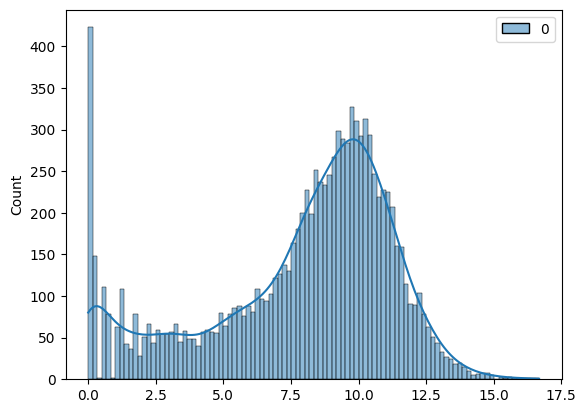

In [13]:
# Resample
import pandas as pd
import numpy as np
import seaborn as sns

DATA_PATH = '/home/ti514716/Datasets/BreastCancer'
Ariel = pd.read_parquet(f'{DATA_PATH}/processed_crossOmics/mRNA.parquet').values

print(f'Ariel aka mRNA shape: {Ariel.shape}')
Ariel_flatten = Ariel[:, np.random.choice(Ariel.shape[1], 1, replace=False)]
print(f'Flattened Ariel aka mRNA shape: {Ariel_flatten.shape}')
sns.histplot(Ariel_flatten, bins=100, kde=True)